In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv('../datasets/vehicles_clean.csv')

In [3]:
cars_norm = cars.copy()

Normalización de atributos numéricos.

In [4]:
cars_norm['price'] = (cars['price'] - min(cars['price'])) / (max(cars['price']) - min(cars['price']))
cars_norm['year'] = (cars['year'] - min(cars['year'])) / (max(cars['year']) - min(cars['year']))
cars_norm['odometer'] = (cars['odometer'] - min(cars['odometer'])) / (max(cars['odometer']) - min(cars['odometer']))
cars_norm['lat'] = (cars['lat'] - min(cars['lat'])) / (max(cars['lat']) - min(cars['lat']))
cars_norm['long'] = (cars['long'] - min(cars['long'])) / (max(cars['long']) - min(cars['long']))

In [5]:
feature_cols = ['year',
               'manufacturer',
               'condition',
               'cylinders',
               'fuel',
               'odometer',
               'title_status',
               'transmission',
               'drive',
               'size',
               'type',
               'paint_color',
               'state',
               'region',
               'model',
               'lat',
               'long']

X = cars_norm[feature_cols]
X = pd.get_dummies(data=X, columns = ['manufacturer',
                                     'condition',
                                     'cylinders',
                                     'fuel',
                                     'title_status',
                                     'transmission',
                                     'drive',
                                     'size',
                                     'type',
                                     'paint_color',
                                     'state',
                                     'region',
                                     'model'])

y = cars_norm[['price','category']]

train_x, test_x, train_y, test_y = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 123)

Obtenemos el número de atributos que es necesario para poder crear la capa de entrada de la red neuronal. Salen muchos debido a que se crea una variable distinta para cada posible valor de cada atributo categórico.

In [6]:
len(train_x.columns)

10065

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Dos capas de 100 neuronas con función de activación tanh. Función de pérdidas MSE. Máximo de épocas 1000. Early Stopping para que deje de ejecutarse cuando no se obtengan mejoras.

In [8]:
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1)

model = Sequential()

model.add(Dense(100, 
                input_dim=10065, 
                activation="tanh"))

model.add(Dense(100, 
                activation="tanh"))

model.add(Dense(1, 
                activation="tanh"))

model.compile(loss='mean_squared_error', 
              optimizer='sgd')

resultado = model.fit(train_x, 
                      train_y['price'], 
                      validation_data =(test_x, test_y['price']), 
                      epochs=1000, 
                      callbacks=[es])

Epoch 1/1000
1802/1802 [==============================] - 13s 7ms/step - loss: 0.0364 - val_loss: 0.0333
Epoch 2/1000
1802/1802 [==============================] - 15s 8ms/step - loss: 0.0319 - val_loss: 0.0314
Epoch 3/1000
1802/1802 [==============================] - 14s 8ms/step - loss: 0.0303 - val_loss: 0.0304
Epoch 4/1000
1802/1802 [==============================] - 14s 8ms/step - loss: 0.0293 - val_loss: 0.0295
Epoch 5/1000
1802/1802 [==============================] - 13s 7ms/step - loss: 0.0287 - val_loss: 0.0290
Epoch 6/1000
1802/1802 [==============================] - 15s 9ms/step - loss: 0.0283 - val_loss: 0.0293
Epoch 00006: early stopping


Función de pérdidas de entramiento y de validación en cada iteración.

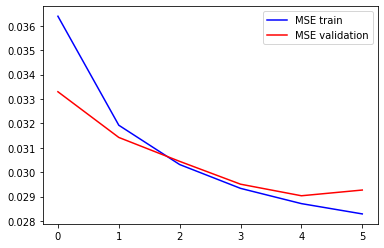

In [9]:
plt.plot(resultado.history['loss'], 'b', label='MSE train')
plt.plot(resultado.history['val_loss'], 'r', label='MSE validation')
plt.legend()

Resultado esperado vs Predicción.

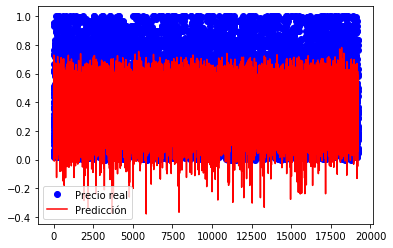

In [10]:
prediccion = model.predict(test_x)

plt.plot(np.array(test_y['price']), 'ob', label='Precio real')
plt.plot(prediccion, 'r', label='Predicción')
plt.legend()

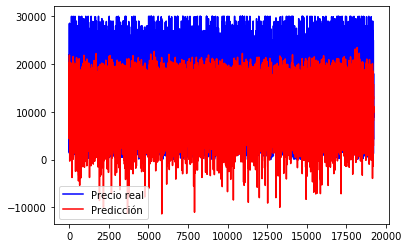

In [11]:
# Para deshacer la normalización
precio_real = test_y['price'] * (max(cars['price']) - min(cars['price'])) + min(cars['price'])
precio_prediccion = prediccion * (max(cars['price']) - min(cars['price'])) + min(cars['price'])

plt.plot(np.array(precio_real), 'b', label='Precio real')
plt.plot(precio_prediccion, 'r', label='Predicción')
plt.legend()